In [927]:
import pandas as pd
pd.set_option('display.max_colwidth', 50)
import numpy as np
import matplotlib.pyplot as plt

In [928]:
Data_May = pd.read_csv("C:\\Users\\Rasmu\\OneDrive\\Skrivebord\\Skole\\5. Semester\\Practical controls & instrumentation\\Data handling\\MYBM08.CS1",encoding='latin-1',skiprows=15,sep='\t',header = 0)
Data_Sept = pd.read_csv("C:\\Users\\Rasmu\\OneDrive\\Skrivebord\\Skole\\5. Semester\\Practical controls & instrumentation\\Data handling\\SPBM08.CS1",encoding='latin-1',skiprows=15,sep = '" ',header = 0)
SIFC = pd.read_excel("C:\\Users\\Rasmu\\OneDrive\\Skrivebord\\Skole\\5. Semester\\Practical controls & instrumentation\\Data handling\\W44_SIFC_PCI_ALLDATA_EXERCISE.xlsx",skiprows = 6)

<ipython-input-928-659f2966eb4e>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Data_Sept = pd.read_csv("C:\\Users\\Rasmu\\OneDrive\\Skrivebord\\Skole\\5. Semester\\Practical controls & instrumentation\\Data handling\\SPBM08.CS1",encoding='latin-1',skiprows=15,sep = '" ',header = 0)


In [929]:
SIFC_df = SIFC[['degC','degC.1','degC.2','degC.3',' 000m3/h',' 000m3/h.1','    kg/s.8','Time']]
SIFC_df.columns = ['degC','degC1','degC2','degC2','Flux1','Flux2','ASH KG/s','Time']

In [930]:
Data_May['"TIME         " "      MW" "STATUS" "      MW" "'] = Data_May['"TIME         " "      MW" "STATUS" "      MW" "'].replace(to_replace='    ', value = '" "',regex = True)


In [931]:
Data_May[['Time','MW','Status','MW1']] = Data_May['"TIME         " "      MW" "STATUS" "      MW" "'].str.split('" "',expand = True)

In [932]:
Data_Sept[['Time','MW']] = Data_Sept['"TIME         '].str.split(' ',expand = True,n=1,regex = True)

In [933]:
Data_May = Data_May.replace(to_replace='"', value = '',regex = True)
Data_May = Data_May.replace(to_replace=r'\s+', value = '',regex = True)
Data_May = Data_May.drop(Data_May.columns[[0]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[0]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[1]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[1]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[2]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[2]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[3]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[3]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[4]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[4]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[5]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[5]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[7]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[7]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[8]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[8]],axis = 1)
Data_May = Data_May.drop(Data_May.columns[[10]],axis = 1)

In [934]:
Data_Sept = Data_Sept.dropna(axis = 1,thresh =500)

In [935]:
Data_Sept = Data_Sept.drop(Data_Sept.columns[[0]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[0]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[1]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[2]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[3]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[4]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[5]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[6]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[7]],axis = 1)
Data_Sept = Data_Sept.drop(Data_Sept.columns[[8]],axis = 1)

In [936]:
Data_Sept = Data_Sept.replace(to_replace=' "', value = '',regex = True)
Data_Sept = Data_Sept.replace(to_replace='F', value = '',regex = True)
Data_Sept = Data_Sept.replace(to_replace=',', value = '.',regex = True)


In [937]:
Data_May.columns = ['%','PPM1','PPM2','PPM3','PPM%','KG/HR','KG/HR1','MG/NM3','Time','Boiler Load','Boiler load %']
Data_Sept.columns = ['MW','%','PPM','PPM1','PPM2','Status%','KG/HR','MG/NM3','Time','Boiler Load']

In [938]:
Data_May['Time'] = pd.to_datetime(Data_May['Time'])
Data_Sept['Time'] = pd.to_datetime(Data_Sept['Time'])
SIFC_df['Time'] = pd.to_datetime(SIFC_df['Time'], format = '%Y%m%d%H%M%S')

<ipython-input-938-a39c0734462a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIFC_df['Time'] = pd.to_datetime(SIFC_df['Time'], format = '%Y%m%d%H%M%S')


In [939]:
for i in range(0,1487):
    if Data_May['PPM3'][i].count(',')>=2:
        Data_May['PPM3'][i] = Data_May['PPM3'][i][:-4]
        

<ipython-input-939-29c2b4782fd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_May['PPM3'][i] = Data_May['PPM3'][i][:-4]


In [940]:
df = Data_May.drop('Time',axis = 1)

In [941]:
Data_May[['%','PPM1','PPM2','PPM3','PPM%','KG/HR','KG/HR1','MG/NM3','Boiler Load','Boiler load %']]= Data_May[['%','PPM1','PPM2','PPM3','PPM%','KG/HR','KG/HR1','MG/NM3','Boiler Load','Boiler load %']].replace(to_replace=',', value = '.',regex = True)

In [942]:
Data_May[['%','PPM1','PPM2','PPM3','PPM%','KG/HR','KG/HR1','MG/NM3','Boiler Load','Boiler load %']] = Data_May[['%','PPM1','PPM2','PPM3','PPM%','KG/HR','KG/HR1','MG/NM3','Boiler Load','Boiler load %']].astype({'%':'float','PPM1':'float','PPM2':'float','PPM3':'float','PPM%':'float','KG/HR':'float','KG/HR1':'float','MG/NM3':'float','Boiler Load':'float','Boiler load %':'float'},errors = 'ignore')

In [943]:
Data_Sept[['MW','%','PPM','PPM1','PPM2','Status%','KG/HR','MG/NM3','Boiler Load']] = Data_Sept[['MW','%','PPM','PPM1','PPM2','Status%','KG/HR','MG/NM3','Boiler Load']].astype({'MW':'float','%':'float','PPM':'float','PPM1':'float','PPM2':'float','Status%':'float','KG/HR':'float','MG/NM3':'float','Boiler Load':'float'},errors = 'ignore')

In [944]:
for i in range(0,len(Data_May)):
    if Data_May['PPM3'][i] <=100:
        Data_May['PPM3'][i] = Data_May['PPM3'][i]*1000

<ipython-input-944-af6532670b18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_May['PPM3'][i] = Data_May['PPM3'][i]*1000


In [945]:
for i in range(0,len(Data_May['KG/HR'])):
    Data_May['KG/HR'][i] = Data_May['KG/HR'][i]*0.1

<ipython-input-945-eace46012764>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_May['KG/HR'][i] = Data_May['KG/HR'][i]*0.1


In [946]:
Data_May_New = pd.merge(
    Data_May,
    SIFC_df,
    how="inner",
    on='Time',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [947]:
Data_Sept_New = pd.merge(
    Data_Sept,
    SIFC_df,
    how="inner",
    on='Time',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

(10471.0, 10476.0)

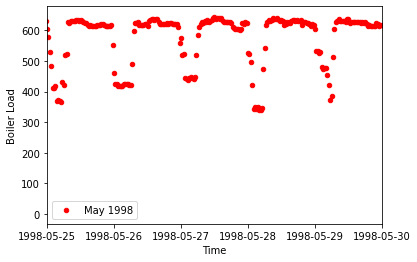

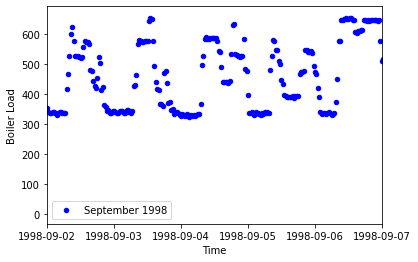

In [948]:
ax1 = Data_May_New.plot.scatter(x='Time',y='Boiler Load', color = 'r', label = 'May 1998')
ax1.set_xlim(pd.Timestamp('1998-05-25'), pd.Timestamp('1998-05-30'))
ax2 = Data_Sept_New.plot.scatter(x='Time',y='Boiler Load', color = 'b', label = 'September 1998')
ax2.set_xlim(pd.Timestamp('1998-09-02'), pd.Timestamp('1998-09-07'))